In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
train = np.genfromtxt('hw6_train.dat')
X_train, y_train = train[:, :-1], train[:, -1]
test = np.genfromtxt('hw6_test.dat')
X_test, y_test = test[:, :-1], test[:, -1]

def Gini(y):
    if(len(y) == 0):
        return 1
    t = np.mean(y == -1)
    return 1 - t**2 - (1 - t)**2

def lossfunc(theta, X, y):
    y1 = y[X < theta]
    y2 = y[X >= theta]
    Gini1 = Gini(y1)
    Gini2 = Gini(y2)
    return len(y1) * Gini1 + len(y2) * Gini2

def Generate_theta(X):
    X = np.sort(X)
    theta = (X[1:] + X[:-1]) / 2
    theta = np.r_[[X[0] - 1], theta]
    theta = np.r_[theta, [X[-1] + 1]]
    
    return theta

def Decision_stump(X, y):
    n, d = X.shape
    Theta = 0
    D = 0
    Score = n
    for i in range(d):
        x = X[:, i]
        theta = Generate_theta(x)
        for theta_ in theta:
            score = lossfunc(theta_, x, y)
            if score < Score:
                Score = score
                Theta = theta_
                D = i
    
    return D, Theta, Score

def isstop(X, y):
    n1 = np.sum(y!=y[0])
    n2 = np.sum(X!=X[0, :])
    return n1 == 0 or n2 == 0

class DTree:
    def __init__(self, theta, d, value=None):

        self.theta = theta

        self.d = d

        self.value = value

        self.left = None
        self.right = None

NUM = 0

def learntree(X, y):
    global NUM
    NUM += 1
    if isstop(X, y):

        return DTree(None, None, y[0])
    else:
        d, theta, score = Decision_stump(X, y)

        tree = DTree(theta, d)

        i1 = X[:, d] < theta
        X1 = X[i1]

        y1 = y[i1]
        i2 = X[:, d] >= theta
        X2 = X[i2]
        y2 = y[i2]

        leftTree = learntree(X1, y1)

        rightTree = learntree(X2, y2)

        tree.left = leftTree
        tree.right = rightTree
        
        return tree
    

def pred(tree, x):

    if tree.value != None:
        return tree.value
    if x[tree.d] < tree.theta:
        return pred(tree.left, x)
    else:
        return pred(tree.right, x)
    
def error(tree, X, y):
    ypred = [pred(tree, x) for x in X]
    return np.mean(ypred!=y)

In [3]:
dtree = learntree(X_train, y_train)
print(error(dtree, X_test, y_test))

0.166


In [7]:
N = 2000
Ein = np.array([])
Eout = np.array([])
tree = []
m, n = train.shape

for i in range(N):
    index = np.random.randint(0, int(m), int(0.5*m))
    X1 = X_train[index, :]
    y1 = y_train[index]
    dtree = learntree(X1, y1)
    tree.append(dtree)
    Ein = np.append(Ein, error(dtree, X_train, y_train))
    Eout = np.append(Eout, error(dtree, X_test, y_test))

In [8]:
print (np.mean(Eout))

0.22960000000000003


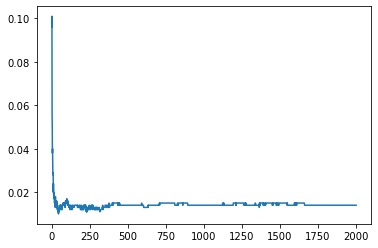

Ein = 0.014293000000000007


In [9]:
def random_forest_error(tree, X, y):
    Error = np.array([])
    N = len(tree)
    for i in range(N):
        E = []
        for j in range(1+i):
            E.append([pred(tree[j], x) for x in X])
        E = np.array(E)

        ypred = np.sign(E.sum(axis=0) + 0.5)
        error = np.mean(ypred!=y)
        Error = np.append(Error, error)
    return Error

Ein_G = random_forest_error(tree, X_train, y_train)

plt.plot(np.arange(1, N+1), Ein_G)
plt.show()

print("Ein = {}".format(np.mean(Ein_G)))

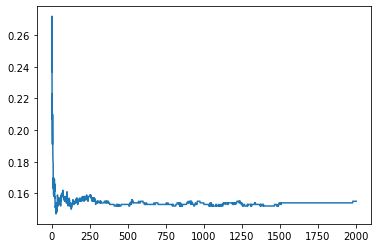

Eout = 0.15407399999999996


In [10]:
Eout_G = random_forest_error(tree, X_test, y_test)

plt.plot(np.arange(1, N+1), Eout_G)
plt.show()

print("Eout = {}".format(np.mean(Eout_G)))